In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv('/content/drive/My Drive/ECG Project/Data/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/My Drive/ECG Project/Data/mitbih_test.csv',header=None)

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1].sample(n=2000,random_state=40)
df_2=train_df[train_df[187]==2].sample(n=2000,random_state=41)
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4].sample(n=2000,random_state=42)
df_0=(train_df[train_df[187]==0]).sample(n=2000,random_state=43)

# df_1_upsample=resample(df_1,replace=True,n_samples=2000,random_state=123)
# df_2_upsample=resample(df_2,replace=True,n_samples=2000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=2000,random_state=125)
# df_4_upsample=resample(df_4,replace=True,n_samples=2000,random_state=126)

train_df=pd.concat([df_0,df_1,df_2,df_3_upsample,df_4])

In [ ]:
train_df[187].value_counts()

4    2000
3    2000
2    2000
1    2000
0    2000
Name: 187, dtype: int64

In [ ]:
t = train_df.sample(1)
x = t.iloc[0,:187].to_numpy()
if np.random.choice([0,1]):
    print('********')
    x = x + 0.02*np.random.randn(187)
plt.plot(x,linewidth = 3);
# plt.close('all')

In [ ]:
sns.set()

2


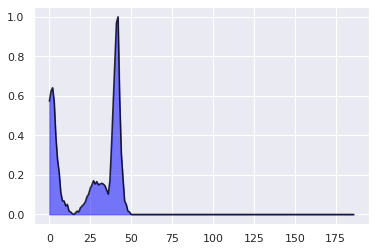

In [ ]:
t = train_df.sample(1)
x = t.iloc[0,:187].to_numpy()
y = t.iloc[0,187]
print(y)
if np.random.choice([0,1]):
    # print('********')
    x = x + 0.02*np.random.randn(187)
    x[x<0] = 0
x_ = np.arange(187)
plt.fill_between( x_, x, color="blue", alpha=0.5)
plt.plot(x_, x, color="black", alpha=0.8)
plt.savefig('abc.png');

In [ ]:
os.chdir('/content/drive/MyDrive/ECG Project/Image2k')
! ls

0  1  2  3  4


In [ ]:
for i in tqdm(range(train_df.shape[0])):
    t = train_df.iloc[i]
    x = t[:187].to_numpy()
    y = int(t[187])
    name = str(i)+'_'+str(y)+'.png'
    folder = str(y)
    save_name = './'+folder+'/'+name
    if np.random.choice([0,1]):
        x = x + 0.02*np.random.randn(187)
        x[x<0] = 0
    x_ = np.arange(187)
    plt.figure()
    plt.fill_between( x_, x, color="blue", alpha=0.5)
    plt.plot(x_, x, color="black", alpha=0.8)
    plt.savefig(save_name);
    plt.clf();
    plt.close('all');
    del t,x,y,x_

In [ ]:
test_df=pd.read_csv('/content/drive/My Drive/ECG Project/Data/mitbih_test.csv',header=None)

In [ ]:
test_df[187]=test_df[187].astype(int)
equilibre=test_df[187].value_counts()
print(equilibre)

0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64


In [ ]:
from sklearn.utils import resample
df_1=test_df[test_df[187]==1]
df_2=test_df[test_df[187]==2].sample(n=1000,random_state=41)
df_3=test_df[test_df[187]==3]
df_4=test_df[test_df[187]==4].sample(n=1000,random_state=42)
df_0=(test_df[test_df[187]==0]).sample(n=1000,random_state=43)

# df_1_upsample=resample(df_1,replace=True,n_samples=2000,random_state=123)
# df_2_upsample=resample(df_2,replace=True,n_samples=2000,random_state=124)
# df_3_upsample=resample(df_3,replace=True,n_samples=2000,random_state=125)
# df_4_upsample=resample(df_4,replace=True,n_samples=2000,random_state=126)

test_df=pd.concat([df_0,df_1,df_2,df_3,df_4])

In [ ]:
test_df[187].value_counts()

4    1000
2    1000
0    1000
1     556
3     162
Name: 187, dtype: int64

In [ ]:
os.chdir('/content/drive/MyDrive/ECG Project/Image_Test')
! ls

0  1  2  3  4


In [ ]:
for i in tqdm(range(test_df.shape[0])):
    t = test_df.iloc[i]
    x = t[:187].to_numpy()
    y = int(t[187])
    name = str(i)+'_'+str(y)+'.png'
    folder = str(y)
    save_name = './'+folder+'/'+name
    x_ = np.arange(187)
    plt.figure()
    plt.fill_between( x_, x, color="blue", alpha=0.5)
    plt.plot(x_, x, color="black", alpha=0.8)
    plt.savefig(save_name);
    plt.clf();
    plt.close('all');
    del t,x,y,x_